In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
# universal path
csv_path = os.path.join('..','data','churn.csv')

# set dataset into 'data'
data = pd.read_csv(csv_path)

In [20]:
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [24]:
# Check number of rows before removing duplicates
len(data)

# Compute the number of duplicated rows
data.duplicated().sum()

0

In [22]:
# NaN count for each column
data.isnull().sum().sort_values(ascending=False)

# NaN percentage for each column
data.isnull().sum().sort_values(ascending=False)/len(data) 

churn                         0.0
accountlength                 0.0
totalintlcharge               0.0
totalintlcalls                0.0
totalintlminutes              0.0
totalnightcharge              0.0
totalnightcalls               0.0
totalnightminutes             0.0
totalevecharge                0.0
totalevecalls                 0.0
totaleveminutes               0.0
totaldaycharge                0.0
totaldaycalls                 0.0
totaldayminutes               0.0
numbervmailmessages           0.0
voicemailplan                 0.0
internationalplan             0.0
numbercustomerservicecalls    0.0
dtype: float64

In [29]:
# categorical to regression, No = 0, Yes = 1
le = LabelEncoder()

data['churn'] = le.fit_transform(data['churn'])
data['internationalplan'] = le.fit_transform(data['internationalplan'])
data['voicemailplan'] = le.fit_transform(data['voicemailplan'])

In [30]:
data

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,1,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,0,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,0,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


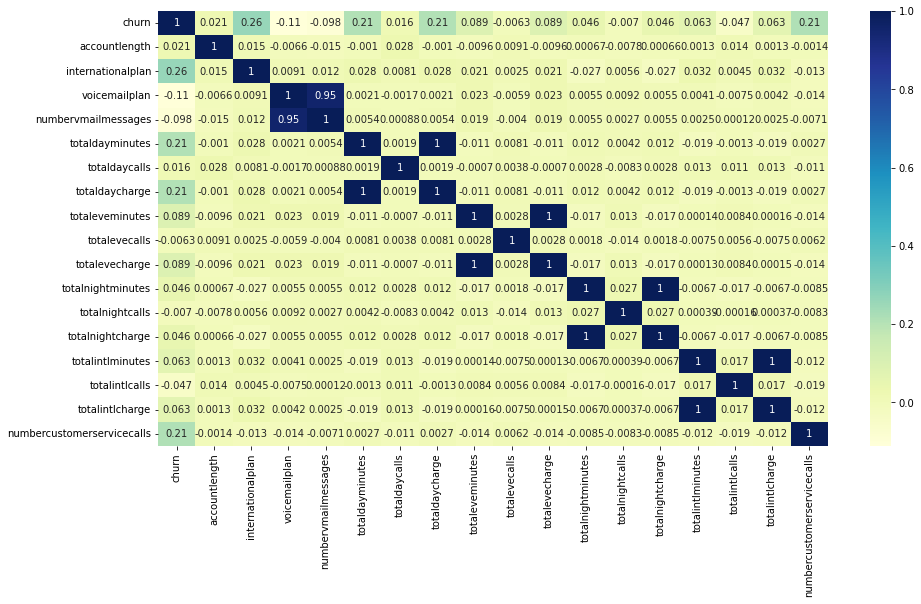

In [31]:
import seaborn as sns

#Size of plot
plt.figure(figsize = (15,8))

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True,
        cmap= "YlGnBu");

In [15]:
# setting X and y
X = data.drop(columns = 'churn')
y = data['churn']

In [16]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)